In [223]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
home directory is /home/heineike/
y1000plus_tools dir is /home/heineike/github/y1000plus_tools/
y1000plus data dir is /home/heineike/genomes/y1000plus/
Importing y1000plus_tools.py
sys.path : 

['/home/heineike/github/y1000plus_tools/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/y1000plus_tools/', '/home/hei

# Load Data

In [3]:
#set up data matrix based on time-calibrated species tree, and take subset of species based on species subset
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)
t.ladderize()

332

In [11]:
#Gets subset of species to focus on

ca_cousins_tree = t.get_common_ancestor(['Candida_albicans', 'Spathaspora_gorwiae'])
ca_cousins = ca_cousins_tree.get_leaves()
ca_cousins_names = [node.name for node in ca_cousins]
ca_cousins_color = "#f9e284"

sc_cousins_tree = t.get_common_ancestor(['Saccharomyces_eubayanus', 'Candida_glabrata'])  #'Vanderwaltozyma_polyspora'
sc_cousins = sc_cousins_tree.get_leaves()
sc_cousins_names = [node.name for node in sc_cousins]
sc_cousins_color = "#aad1ef"

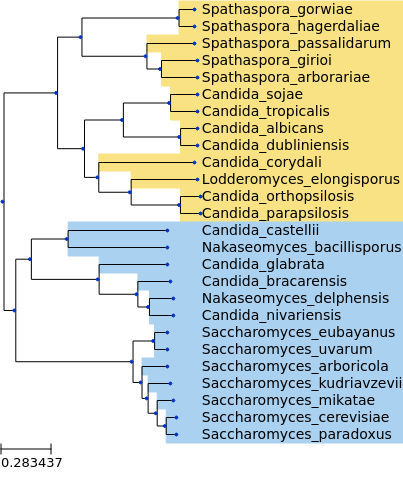

In [231]:
# Make phylogentic tree to visualize species of interest

y1000plus_dir = '/home/heineike/genomes/y1000plus/'
tree_fname = y1000plus_dir + '332_2408OGs_time-calibrated_phylogeny_species-names_updated.newick'
t = Tree(tree_fname)

ts = TreeStyle()
ts.show_leaf_name = False
#ts.show_branch_length = True

# for node in t.traverse():
#     if not(node.is_leaf()):
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")



leaves_to_view = {}
for color, name_set in [(sc_cousins_color, sc_cousins_names),(ca_cousins_color, ca_cousins_names)]:
    for name in name_set: 
        leaves_to_view[name] = color

t.prune(leaves_to_view.keys()) 

t.ladderize()

for node in t.get_leaves():
    name = node.name
    #group, abbrev = leaves_to_view[name]
    
    nstyle = NodeStyle()
    node_color = leaves_to_view[name] #node_color_dict[group]
    nstyle['bgcolor']=node_color
    node.set_style(nstyle)
    
    node_label_face = TextFace(name)  # + " ({})".format(abbrev)) #, fsize=16, fgcolor="black")
    node.add_face(node_label_face, column=1, position = "aligned")

fname = figsave_dir + 'time_tree_sc_ca_cousins.svg'
t.render(fname, tree_style=ts)
t.render('%%inline', tree_style=ts)

In [181]:
#Load species subset - either smaller subset, or all species

#Currently loading all species

##Load all species and take subset that has genomes
y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

# #not including outgroup species
# y1000_species_subset = y1000_species[y1000_species['Major clade']!='outgroup']

#Species subset is only the Calb and Scer cousins
y1000_species_subset = y1000_species[y1000_species['species_names_fig2'].isin(ca_cousins_names+sc_cousins_names)]


#Lookup table for og id number
spec_og_id_lookup = dict(zip(y1000_species_subset['original_genome_id'], y1000_species_subset['spec_og_id']))

#Lookup table for genome name (from fig2 name)
genome_fig2_lookup = dict(zip(y1000_species_subset['species_names_fig2'],y1000_species_subset['original_genome_id']))

#genome_names = y1000_species_subset['original_genome_id']

#puts genome names in correct order per above tree
genome_names = [genome_fig2_lookup[fig2_name] for fig2_name in t.get_leaf_names()]


In [333]:
# fname_motif = data_processing_dir + os.path.normpath("motifs/CuRE.meme")     #Did it for PDS, STRE, TATA, and CuRE
motif_meme_dict = {'GCN4':'GCN4_jaspar_MA0303.1',
                   'LYS14':'Lys14_intergenics_20190415', 
                   'LEU3': 'LEU3_jaspar_MA0324.1',
                   'MET31': 'MET31_jaspar_MA0333.1'
                  }

motif_dir = home_dir + os.path.normpath('github/yeast_esr_expression_analysis/expression_data/motifs') + os.sep

for motif_name, motif_meme_fname_base in motif_meme_dict.items():
    fname_motif = motif_dir + motif_meme_fname_base + '.meme'
    fname_logo_printout = motif_dir + motif_meme_fname_base + '.eps'

    ceqlogo_command = ([ "/home/heineike/meme/libexec/meme-5.0.2/ceqlogo",
                         "-i1", fname_motif,
                         "-o", fname_logo_printout,
                         "-f", "EPS"]
                   )
    
    subprocess.run(ceqlogo_command)

#Should run with subprocess


In [228]:
#For each species, get background for each motif.  

#Should save precomputed normalized values for each gene in each species (as csv)

#(threshold (not used), motif_fname, pseudocount)

#The pseudocount is to avoid getting -inf for PSSM searches. 
#GCN4 doesn't really need one - the count matrix is all positive values and the smallest value is 1.  
#there are 998 counts
#Lys14 has 51 total counts so I made the pseudocount 51/
pseudocount_factor = 1
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/GCN4_MA0303.1.jaspar', 1/pseudocount_factor), #
                     'LYS14':(1e-4, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/Lys14_intergenics_20190415.jaspar', 51/998/pseudocount_factor),
                     'LEU3': (1e-3, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/LEU3_MA0324.1.jaspar', 100/998/pseudocount_factor), 
#                     'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
                     'MET31': (1e-3, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/MET31_MA0333.1.jaspar', 100/998/pseudocount_factor)
                   }


L_prom = 700
L_prom_min = 200


#for each species





all_max_scores = {}

for genome_name in genome_names:
    print(genome_name)

    #genome_name = 'saccharomyces_eubayanus' #'candida_dubliniensis'
    #load all promoters for the species
    all_promoters_fname = home_dir + os.path.normpath('github/yeast_esr_expression_analysis/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')

    #Function: given promoters, calculate background frequency.

    #Calculates background for a particular fasta file (should make into a function)
    #Could check if there are ambiguous bases R,Y,N.  for C. Dub there were not


    background, background_rev = y1000plus_tools.background_from_promoters(all_promoters_fname, L_prom)

    all_max_scores_spec = None


    for (motif_name, (thresh, motif_fname, pseudocount)) in motif_hit_params.items():
    


        print(motif_name)
        all_max_scores_motif = y1000plus_tools.promoters_all_max_scores(all_promoters_fname, motif_name, thresh, motif_fname, pseudocount, background, background_rev, L_prom, L_prom_min)

        #Merge data from each motif into one dataframe
        if all_max_scores_spec is None: 
            all_max_scores_spec = all_max_scores_motif #
        else: 
            all_max_scores_spec = all_max_scores_spec.merge(all_max_scores_motif.loc[:,[motif_name + '_' + col for col in ['max_score', 'percentile']]], how ='inner',left_index = True, right_index=True)


    #Save scores
    all_max_scores_fname = y1000plus_dir + os.path.normpath('promoter_sets/all_promoters_by_spec/' + genome_name + '/motif_scores_20191205.csv' )
    all_max_scores_spec.to_csv(all_max_scores_fname)
    
    #max_score_mean = all_max_scores_motif['max_score'].mean()
    #max_score_std = all_max_scores_motif['max_score'].std()
    #all_max_scores_motif['Z-score'] = (all_max_scores_motif['max_score']-max_score_mean)/max_score_std



spathaspora_gorwiae
GCN4
LEU3
LYS14
MET31
spathaspora_hagerdaliae
GCN4
LEU3
LYS14
MET31
spathaspora_passalidarum
GCN4
LEU3
LYS14
MET31
spathaspora_girioi
GCN4
LEU3
LYS14
MET31
spathaspora_arborariae
GCN4
LEU3
LYS14
MET31
candida_sojae
GCN4
LEU3
LYS14
MET31
candida_tropicalis
GCN4
LEU3
LYS14
MET31
candida_albicans
GCN4
LEU3
LYS14
MET31
candida_dubliniensis
GCN4
LEU3
LYS14
MET31
yHMPu5000034990_candida_corydali_160519
GCN4
LEU3
LYS14
MET31
lodderomyces_elongisporus
GCN4
LEU3
LYS14
MET31
candida_orthopsilosis
GCN4
LEU3
LYS14
MET31
candida_parapsilosis
GCN4
LEU3
LYS14
MET31
nakaseomyces_castellii
GCN4
LEU3
LYS14
MET31
nakaseomyces_bacillisporus
GCN4
LEU3
LYS14
MET31
candida_glabrata
GCN4
LEU3
LYS14
MET31
nakaseomyces_bracarensis
GCN4
LEU3
LYS14
MET31
nakaseomyces_delphensis
GCN4
LEU3
LYS14
MET31
nakaseomyces_nivariensis
GCN4
LEU3
LYS14
MET31
saccharomyces_eubayanus
GCN4
LEU3
LYS14
MET31
saccharomyces_uvarum
GCN4
LEU3
LYS14
MET31
saccharomyces_arboricola
GCN4
LEU3
LYS14
MET31
saccharomyces_

# Plot all distributions of all max scores for a given motif

spathaspora_gorwiae
spathaspora_hagerdaliae
spathaspora_passalidarum
spathaspora_girioi
spathaspora_arborariae
candida_sojae
candida_tropicalis
candida_albicans
candida_dubliniensis
yHMPu5000034990_candida_corydali_160519
lodderomyces_elongisporus
candida_orthopsilosis
candida_parapsilosis
nakaseomyces_castellii
nakaseomyces_bacillisporus
candida_glabrata
nakaseomyces_bracarensis
nakaseomyces_delphensis
nakaseomyces_nivariensis
saccharomyces_eubayanus
saccharomyces_uvarum
saccharomyces_arboricola
saccharomyces_kudriavzevii
saccharomyces_mikatae
saccharomyces_cerevisiae
saccharomyces_paradoxus


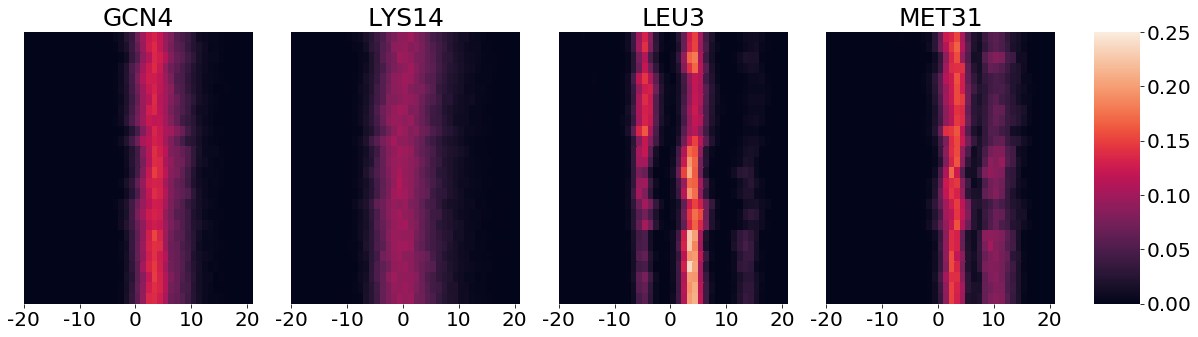

In [314]:
#Show distribution of max scores for each motif

motif_names = ['GCN4', 'LYS14', 'LEU3', 'MET31']
#fig, axarr = plt.subplots(len(genome_names),len(motif_names), sharex=True, sharey=True,figsize = (10,100))

minscore = -20
maxscore = 22
nbins = 42
bins = np.arange(minscore,maxscore,(maxscore-(minscore))/nbins)

hist_data = {motif_name:[] for motif_name in motif_names}

#all_max_scores[genome_name]

for genome_name in genome_names: 
    print(genome_name)
    #load data for a given genome
    all_max_scores_fname = y1000plus_dir + os.path.normpath('promoter_sets/all_promoters_by_spec/' + genome_name + '/motif_scores_20191205.csv' )
    all_max_scores_spec = pd.read_csv(all_max_scores_fname, index_col=0)
    for motif_name in motif_names: 
        hist_N, hist_bins = np.histogram(all_max_scores_spec[motif_name + '_max_score'].dropna(),bins=bins, density=True)

#         total_counts = len(all_max_scores_spec)
        hist_data[motif_name].append(hist_N)



fig = plt.figure(figsize=(20,5))

#, axarr = plt.subplots(1,4, figsize=(20,5))

gs = GridSpec(1, 5, width_ratios=[5,5,5,5,1], height_ratios=[1])

cbar_ax = fig.add_subplot(gs[len(motif_names)])

for jj, motif_name in enumerate(motif_names): 
    ax = fig.add_subplot(gs[jj])

    if jj==len(motif_names)-1:
        sns.heatmap(hist_data[motif_name], ax = ax, yticklabels = False, vmin = 0.0, vmax =0.25, cbar=True, cbar_ax=cbar_ax)
    else:
        sns.heatmap(hist_data[motif_name], ax = ax, yticklabels = False, vmin = 0.0, vmax =0.25, cbar=False)
    ax.set_xticks([0,10,20,30,40])
    ax.set_xticklabels(['-20','-10','0','10','20'],fontdict={'size':'20'}, rotation = 0)
    ax.set_title(motif_name, fontdict={'size':'25'})

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontdict={'size':'20'})
fig.savefig(figsave_dir + 'sc_ca_max_score_dist.svg')

# Metabolic pathway gene presence

In [250]:
#Load AA metabolism genes, make goi_og_lookup
#aa_met_genes = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/aa_metabolism_genes.csv'), index_col=0)



In [252]:
#make pathway list
pathway_table = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/scer_AABGs_pathways.csv'), index_col = 0)
all_pway_names = set()
for column in ['Pathway'+str(NN) for NN in range(1,5)]:
    all_pway_names = all_pway_names | (set(pathway_table[column]))

all_pway_names = all_pway_names - {np.nan}

all_pways = {pway : [] for pway in all_pway_names}


for (genename, (common_name, pway1,pway2, pway3, pway4)) in pathway_table.iterrows():
    for pway in [pway1,pway2, pway3, pway4]:
        if isinstance(pway, str):
            all_pways[pway].append(common_name)

            
#Combine overlapping pathways
all_pways['bcaa'] = list(set(all_pways['leu'] + all_pways['ile'] + all_pways['val'] + all_pways['branched']))
all_pways['aromatic'] = list(set(all_pways['chorismate'] + all_pways['phe'] + all_pways['trp'] + all_pways['tyr']))
all_pways['cys_met_thr'] = list(set(all_pways['homoserine']+all_pways['met']+all_pways['cys']+all_pways['thr']))

all_pways_combined_keys = list(set(all_pways.keys()) - set(['leu','ile','val','branched','chorismate','phe','trp','tyr','homoserine','met','cys','thr']))

all_pways_combined = {}
for pway in all_pways_combined_keys: 
    all_pways_combined[pway] = all_pways[pway]
    all_pways_combined[pway].sort()

regulator_list = [('arg','ARG80'),('arg','ARG81'),('lys','LYS14'), 
                  ('cys_met_thr','MET4'),('cys_met_thr','MET28'),('cys_met_thr','CBF1'),
                  ('cys_met_thr','MET31'),('bcaa','LEU3'),('general','GCN4')]  #not including Met31 since it is a recent duplication

dupe_dict = {'cys_met_thr':['MET32']} #maybe consider SHM2 and SHM1 - they have two genes in the same orthogroup. 

#Puts the regulators in the first column
for pway, pway_reg in regulator_list:
    if pway in all_pways_combined.keys():
        pway_list = all_pways_combined[pway]
        pway_list.insert(0, pway_list.pop(pway_list.index(pway_reg)))
    
#drop genes that are duplicates in the S.cer based regulator list we are using
for pway, pway_dupes in dupe_dict.items():
    pway_list = all_pways_combined[pway]
    for pway_dupe in pway_dupes: 
        pway_list.pop(pway_list.index(pway_dupe))
        
#Make a set of just regulators: 

all_pways_combined['regulators'] = [regulator for (pway,regulator) in regulator_list]
    

all_pways_combined

{'arg': ['ARG81',
  'ARG80',
  'ARG1',
  'ARG2',
  'ARG3',
  'ARG4',
  'ARG5,6',
  'ARG7',
  'ARG8'],
 'aromatic': ['ARO1',
  'ARO2',
  'ARO3',
  'ARO4',
  'ARO7',
  'ARO8',
  'ARO9',
  'PHA2',
  'TRP1',
  'TRP2',
  'TRP3',
  'TRP5',
  'TYR1'],
 'asn': ['ASN2'],
 'asp': ['AAT1', 'AAT2', 'PYC2'],
 'bcaa': ['LEU3',
  'BAT2',
  'ILV1',
  'ILV2',
  'ILV3',
  'ILV5',
  'ILV6',
  'LEU1',
  'LEU2',
  'LEU4'],
 'cys_met_thr': ['MET31',
  'CBF1',
  'MET28',
  'MET4',
  'CYS3',
  'CYS4',
  'HOM2',
  'HOM3',
  'HOM6',
  'MET10',
  'MET14',
  'MET16',
  'MET17',
  'MET2',
  'MET3',
  'MET5',
  'MET6',
  'MET7',
  'THR1',
  'THR4'],
 'gln': ['GLN1'],
 'glu': ['ALT1', 'GDH3', 'GLT1'],
 'gly': ['AGX1', 'GLY1'],
 'his': ['HIS1',
  'HIS2',
  'HIS3',
  'HIS4',
  'HIS5',
  'HIS6',
  'HIS7',
  'PRS1',
  'PRS3',
  'PRS4',
  'PRS5'],
 'lys': ['LYS14', 'LYS1', 'LYS12', 'LYS2', 'LYS21', 'LYS4', 'LYS5', 'LYS9'],
 'pro': ['PRO1', 'PRO2', 'PRO3'],
 'regulators': ['ARG80',
  'ARG81',
  'LYS14',
  'MET4',
  'MET28

In [259]:
#Get goi lookup list
all_met_genes = []

for pway, pway_list in all_pways_combined.items():
    all_met_genes.append(pway_list)

gois = y1000plus_tools.yeast_esr_exp.SC_orf_lookup_by_name(list(set(chain.from_iterable(all_met_genes))))
#gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
scer_lookup['SC_common_name'] = y1000plus_tools.yeast_esr_exp.SC_common_name_lookup(scer_lookup.index)

y1000_id_lookup_common = dict(zip(scer_lookup['SC_common_name'], scer_lookup['y1000_id']))
sc_genename_lookup_common = dict(zip(scer_lookup['SC_common_name'],scer_lookup.index))

# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4697', '110_4199']


In [268]:
all_max_scores_spec.loc[:,['len',  motif_name + '_percentile']]

,len,LYS14_percentile
id,,
saccharomyces_paradoxus@Seq_1,700,0.842199
saccharomyces_paradoxus@Seq_10,700,0.888845
saccharomyces_paradoxus@Seq_100,700,0.357880
saccharomyces_paradoxus@Seq_1000,700,0.813021
saccharomyces_paradoxus@Seq_1001,700,0.639539
saccharomyces_paradoxus@Seq_1002,700,0.964669
saccharomyces_paradoxus@Seq_1003,700,0.577610
saccharomyces_paradoxus@Seq_1004,700,0.143112
saccharomyces_paradoxus@Seq_1005,700,0.082771


In [271]:
#get pathway data. 

## The number N does not change for each motif it changes with the pathway, so I am collecting redundant data

pways = ['lys', 'cys_met_thr','bcaa', 'regulators']

#Build dataframe with percentile scores for each pathway
pathway_data = {}
for motif_name in motif_names: 
    print(motif_name)
    pathway_data_motif = {}
    for pway in pways: 
        print(pway)
        pathway_data_motif_pway_scores = {}
        pathway_data_motif_pway_N = {}
        for genome_name in genome_names: 
            all_max_scores_fname = y1000plus_dir + os.path.normpath('promoter_sets/all_promoters_by_spec/' + genome_name + '/motif_scores_20191205.csv' )
            all_max_scores_spec = pd.read_csv(all_max_scores_fname, index_col=0)
    
            
            #scores = all_max_scores[genome_name][motif_name]
            scores = all_max_scores_spec.loc[:,[motif_name + '_percentile']] #'len'
            
            spec_id = spec_og_id_lookup[genome_name]

            #make gene_id lookup for the species
            gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
            gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')
            y1000_id_gene_id_lookup = dict(gene_lookup_spec['gene_id'])
            
            gene_scores = []
            gene_N = []
            
            for gene in all_pways_combined[pway]:#
                #gene = 'LYS1'
                y1000_id = y1000_id_lookup_common[gene]
                og = goi_og_lookup[y1000_id]
                og_genes = og_genes_lookup[og]

                spec_genes = [og_gene for og_gene in list(og_genes) if og_gene.split('_')[0]==str(spec_id)]
                
                if genome_name == 'saccharomyces_cerevisiae': 
                    spec_y1000_ids = [y1000_id_gene_id_lookup[spec_gene] for spec_gene in spec_genes]
                else: 
                    spec_y1000_ids = [genome_name+'@'+y1000_id_gene_id_lookup[spec_gene] for spec_gene in spec_genes]

                gene_N.append(len(spec_genes))

                if len(spec_y1000_ids)==0:
                    gene_scores.append(-1)  #-1 is for when the gene is missing, nan is when no score was present
                else: 
                    gene_scores.append(max(scores.loc[spec_y1000_ids][motif_name + '_percentile']))

                  
            pathway_data_motif_pway_scores[genome_name]=gene_scores
            pathway_data_motif_pway_N[genome_name]=gene_N
        
        pathway_data_motif_pway_scores_df = pd.DataFrame.from_dict(pathway_data_motif_pway_scores, orient='index', columns = all_pways_combined[pway])
        pathway_data_motif_pway_N_df = pd.DataFrame.from_dict(pathway_data_motif_pway_N, orient='index', columns = all_pways_combined[pway])
        pathway_data_motif_pway = {'scores':pathway_data_motif_pway_scores_df, 'N': pathway_data_motif_pway_N_df}     
        pathway_data_motif[pway] = pathway_data_motif_pway
    
    pathway_data[motif_name]= pathway_data_motif



GCN4
lys
cys_met_thr
bcaa
regulators
LYS14
lys
cys_met_thr
bcaa
regulators
LEU3
lys
cys_met_thr
bcaa
regulators
MET31
lys
cys_met_thr
bcaa
regulators


{'GCN4': {'bcaa': {'N':                                          LEU3  BAT2  ILV1  ILV2  ILV3  ILV5  \
   candida_glabrata                            1     2     1     1     1     1   
   candida_dubliniensis                        1     2     1     1     1     1   
   spathaspora_arborariae                      1     2     1     1     1     1   
   spathaspora_gorwiae                         1     4     1     1     1     1   
   saccharomyces_mikatae                       1     2     1     1     1     1   
   nakaseomyces_delphensis                     1     2     1     1     1     1   
   spathaspora_girioi                          1     2     1     1     1     1   
   nakaseomyces_nivariensis                    1     2     1     1     1     1   
   saccharomyces_cerevisiae                    1     2     1     1     1     1   
   nakaseomyces_bacillisporus                  1     2     1     2     1     1   
   spathaspora_hagerdaliae                     1     3     1     1     1     

regulators


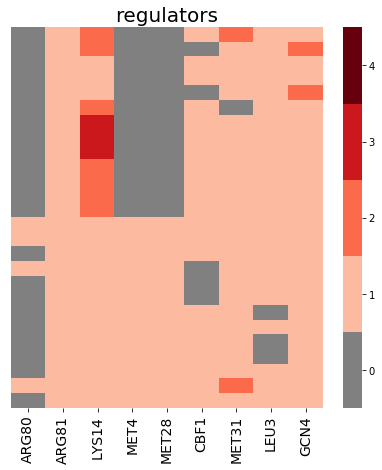

In [326]:
#Visualize number of paralogs
#Visualize number of paralogs
## Select out appropriate columns and visualize heatmap

set_to_plot = 'regulators'

pway_sets = {'pways': (['lys', 'cys_met_thr','bcaa'],4), 
             'regulators': (['regulators'],4)}
#list of pathways, max number of paralogs

pways, max_N_paralogs = pway_sets[set_to_plot]


fig, axarr = plt.subplots(1,len(pways), figsize=(len(pways)*7,7))
fig.subplots_adjust(wspace = 0.3, hspace = 0.6)



vmin = -0.5
vmax = max_N_paralogs + 0.5
cmap = plt.cm.get_cmap('Reds', vmax+0.5)
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

#cmap = sns.cm.rocket_r

# create the new map

cmap_new = colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)


motif_name = 'LYS14'
for jj, pway in enumerate(pways):
    print(pway)
    if str(type(axarr))== "<class 'matplotlib.axes._subplots.AxesSubplot'>":
        ax = axarr
    else: 
        ax = axarr[jj]
    show_cbar=False
    if jj==(len(pways)-1):
        show_cbar=True

    #columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups[goi_group_name]]
    data_matrix_raw = pathway_data[motif_name][pway]['N'].loc[genome_names,:]
    data_matrix_raw.fillna(-1, inplace=True)
    #data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
    #data_matrix = data_matrix_raw.replace('short_promoters',20)
    #data_matrix = data_matrix.apply(pd.to_numeric)  #not sure why numbers are suddenly strings
    sns.heatmap(data_matrix_raw, ax=ax, cmap = cmap_new, vmin = vmin, vmax =vmax, cbar=show_cbar)
    ax.set_title(pway, fontdict={'size':20})
    #if jj != 0:
    ax.set_yticks([])
    #ax.set_xticklabels('')
    ax.set_xticklabels(ax.get_xticklabels(), fontdict = {'size':14}, rotation=90)
    ax.set_ylabel('')

fig.savefig(figsave_dir + set_to_plot + '_N_genes.svg')

In [302]:
[5]*2

[5, 5]

cys_met_thr
MET31
cys_met_thr
GCN4


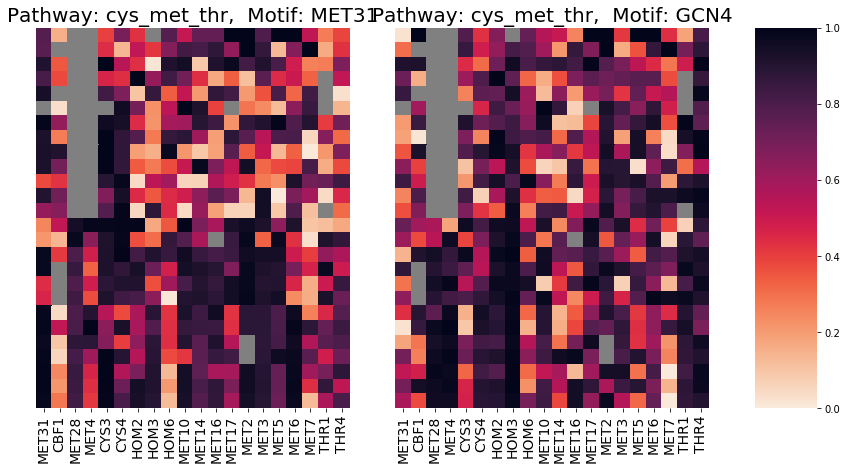

In [323]:
## Select out appropriate columns and visualize heatmap

pway = 'cys_met_thr' #'bcaa' #'lys' # 

motif_sets = {'lys':['LYS14','GCN4'], 
              'cys_met_thr': ['MET31', 'GCN4'],
              'bcaa':['LEU3','GCN4']
             }

motif_names = motif_sets[pway]

fig = plt.figure(figsize=(14,7))

gs = GridSpec(1, len(motif_names) + 1, width_ratios=[5]*len(motif_names) + [1], height_ratios=[1])

cbar_ax = fig.add_subplot(gs[len(motif_names)])


#fig, axarr = plt.subplots(len(motif_names),1, figsize=(14,7))
#fig.subplots_adjust(wspace = 0.3, hspace = 0.6)

cmap = sns.cm.rocket_r
cmap.set_under('grey')
cmap.set_over('skyblue')
vmin=0.0
vmax = 1.0


#for jj, pway in enumerate(pways):
for kk, motif_name in enumerate(motif_names):
    print(pway)
    print(motif_name)       
    #ax = axarr[kk]
    ax = fig.add_subplot(gs[kk])
    show_cbar=False
#     if kk==(len(motif_name)-1):
#         show_cbar=True

    #columns_to_view = [goi_common_name + '_' + motif_name for goi_common_name in goi_groups[goi_group_name]]
    data_matrix_raw = pathway_data[motif_name][pway]['scores'].loc[genome_names,:]
    #fill NA with 2 which is over the maximum score
    data_matrix_raw.fillna(2, inplace=True)
    #data_matrix_raw.replace('NO_ORTH',-1, inplace=True)
    #data_matrix = data_matrix_raw.replace('short_promoters',20)
    #data_matrix = data_matrix.apply(pd.to_numeric)  #not sure why numbers are suddenly strings
    sns.heatmap(data_matrix_raw, ax=ax, cmap = sns.cm.rocket_r, vmin = vmin, vmax =vmax, cbar=True, cbar_ax = cbar_ax)
    ax.set_title('Pathway: ' + pway + ',  Motif: '+ motif_name, fontdict={'size':20})
    if jj != 0:
        ax.set_yticks([])
    #ax.set_xticklabels('')
    ax.set_xticklabels(ax.get_xticklabels(), fontdict = {'size':14}, rotation=90)
    #ax.set_ylabel('')

fig.savefig(figsave_dir + 'sc_ca_scores_'+pway + '.svg')

In [318]:
pathway_data[motif_name][pway]['scores']

,LYS14,LYS1,LYS12,LYS2,LYS21,LYS4,LYS5,LYS9
candida_glabrata,0.998444,0.999611,0.999806,0.997861,0.996111,0.999028,0.221466,0.999222
candida_dubliniensis,0.176836,0.156497,0.287948,0.369810,0.817448,0.121869,0.020844,0.911246
spathaspora_arborariae,0.540616,0.599235,0.838407,0.310315,0.453296,0.863107,-1.000000,0.101235
spathaspora_gorwiae,0.641509,0.602276,0.615004,0.346960,0.779874,1.000000,-1.000000,0.743486
saccharomyces_mikatae,0.995523,0.998168,0.994709,0.995319,0.996947,0.997354,0.775132,0.997965
nakaseomyces_delphensis,0.985700,0.986484,0.984917,0.973164,0.986680,0.162390,0.937316,0.985309
spathaspora_girioi,0.677261,0.590227,0.438883,0.527996,0.609535,0.772315,-1.000000,-1.000000
nakaseomyces_nivariensis,0.992317,0.991932,0.987706,0.992124,0.992701,0.990204,0.512101,0.991548
saccharomyces_cerevisiae,0.997914,1.000000,0.995530,0.997765,0.999851,0.998808,0.815703,0.999702
nakaseomyces_bacillisporus,0.980388,0.990710,0.990297,0.960983,0.982865,0.946325,0.752477,0.990091


In [45]:
genome_name = next(iter(genome_names))

all_promoters_fname = home_dir + os.path.normpath('github/yeast_esr_expression_analysis/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')

pseudocount_factor = 1
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/GCN4_MA0303.1.jaspar', 1/pseudocount_factor), #
                     'LYS14':(1e-4, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/Lys14_intergenics_20190415.jaspar', 51/998/pseudocount_factor),
                     'LEU3': (1e-3, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/LEU3_MA0324.1.jaspar', 100/998/pseudocount_factor), 
#                     'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
                     'MET32': (1e-3, home_dir + 'github/yeast_esr_expression_analysis/expression_data/motifs/MET32_MA0333.1.jaspar', 100/998/pseudocount_factor)
                   }


L_prom = 700
L_prom_min = 200

motif_name = 'LYS14'

(thresh, motif_fname, pseudocount) = motif_hit_params[motif_name]


In [47]:
all_max_scores_motif = promoters_all_max_scores(all_promoters_fname, motif_name, thresh, motif_fname, pseudocount, background, background_rev, L_prom, L_prom_min)


In [52]:
all_max_scores_motif_2 = all_max_scores_motif.copy()

In [69]:
motif_name = 'LYS142'

In [61]:
all_max_scores_motif.rename(columns = {col : motif_name + '_' + col for col in ['max_score', 'percentile']}, inplace = True)

In [70]:

all_max_scores_motif_2.loc[:,[motif_name + '_' + col for col in ['max_score', 'percentile']]]

,LYS142_max_score,LYS142_percentile
id,,
candida_dubliniensis@Seq_1,-3.152937,0.159186
candida_dubliniensis@Seq_10,-0.935139,0.356026
candida_dubliniensis@Seq_100,3.174097,0.722306
candida_dubliniensis@Seq_1000,5.350101,0.847033
candida_dubliniensis@Seq_1001,-6.215576,0.026223
candida_dubliniensis@Seq_1002,-0.504215,0.396201
candida_dubliniensis@Seq_1003,-3.728931,0.120693
candida_dubliniensis@Seq_1004,6.384138,0.888889
candida_dubliniensis@Seq_1005,-1.900993,0.267608


In [294]:
#For each motif, get background score for a given motif

#(threshold (not used), motif_fname, pseudocount)

#The pseudocount is to avoid getting -inf for PSSM searches. 
#GCN4 doesn't really need one - the count matrix is all positive values and the smallest value is 1.  
#there are 998 counts
#Lys14 has 51 total counts so I made the pseudocount 51/
pseudocount_factor = 1
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_MA0303.1.jaspar', 1/pseudocount_factor), #
                     'LYS14':(1e-4, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.jaspar', 51/998/pseudocount_factor),
                     'LEU3': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/LEU3_MA0324.1.jaspar', 100/998/pseudocount_factor), 
#                     'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
                     'MET32': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/MET32_MA0333.1.jaspar', 100/998/pseudocount_factor)
                   }


L_prom = 700


#for each species

genome_name = 'saccharomyces_eubayanus' #'candida_dubliniensis'
#load all promoters for the species
all_promoters_fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')


#Calculates background for a particular fasta file (should make into a function)
#Could check if there are ambiguous bases R,Y,N.  for C. Dub there were not


background_counts= {'A':0, 'C':0, 'T':0, 'G':0} #, 'R':0, 'Y':0, 'N':0}
all_promoters = SeqIO.parse(all_promoters_fname, "fasta")

for prom in all_promoters:
    start = max(len(prom.seq)-L_prom,0)
    seq_trunc = prom.seq[start:len(prom.seq)]
    for base in 'ACTG': #RYN': 
        newcount = seq_trunc.count(base)
        background_counts[base] = background_counts[base] + newcount
        
        
counts_tot = sum(background_counts.values())
background = {}
for base, count in background_counts.items(): 
    background[base] = count/counts_tot

background_rev = {}
background_rev['A']=background['T']
background_rev['C']=background['G']
background_rev['T']=background['A']
background_rev['G']=background['C']
background_rev


all_max_scores = {}



for (motif_name, (thresh, motif_fname, pseudocount)) in motif_hit_params.items():
    print(motif_name)

    with open(motif_fname) as f: 
        motif = motifs.read(f, "jaspar")
    
    motif.pseudocounts = pseudocount
    motif.background = background

    motif_rev = copy.deepcopy(motif)
    motif_rev.background = background_rev



    #iterate through promoters and get background distribution and write down max score
    all_promoters = SeqIO.parse(all_promoters_fname, "fasta")
    all_max_scores_dict = {'id':[],'len':[],'max_score': []}

    for prom in all_promoters:
        all_max_scores_dict['id'].append(prom.id)

        prom.seq.alphabet = IUPAC.unambiguous_dna

        #truncate by promoter length
        start = max(len(prom.seq)-L_prom,0)
        seq_trunc = prom.seq[start:len(prom.seq)]

        all_max_scores_dict['len'].append(len(seq_trunc))
        
        if len(seq_trunc)<=motif.length:
            all_max_scores_dict['max_score'].append(np.nan)
        
        else: 
            #calculate forward scores
            scores = motif.pssm.calculate(seq_trunc)
            max_score_fwd = max(scores)

            #calculate reverse scores
            seq_trunc_rev = seq_trunc.reverse_complement()
            scores_rev = motif_rev.pssm.calculate(seq_trunc_rev)
            max_score_rev = max(scores_rev)

            max_score = max(max_score_fwd,max_score_rev)

            all_max_scores_dict['max_score'].append(max_score)

            ##catch when log odds is above a certain threshold

    all_max_scores_motif = pd.DataFrame.from_dict(all_max_scores_dict, orient='columns')
    all_max_scores_motif.set_index('id', inplace=True)
    #max_score_mean = all_max_scores_motif['max_score'].mean()
    #max_score_std = all_max_scores_motif['max_score'].std()
    #all_max_scores_motif['Z-score'] = (all_max_scores_motif['max_score']-max_score_mean)/max_score_std
    all_max_scores[motif_name] = all_max_scores_motif










#Extract all promoters (files should be saved in advance)
#load all promoters for the species
#all_promoters_fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')

#Do fimo scan of all promoters
#fimo_hits = y1000plus_tools.promoter_scan_fimo(all_promoters_fname, fname_prefix, motif_name, motif_fname, thresh, motif_in_file='All')   

#all_promoters = SeqIO.parse(all_promoters_fname, "fasta")

#for promoter in all_promoters

#all_promoters_id_to_L = {}


#for each seq, extract
#seq name, L, list of hit tuples (location, score)
#process list of hit tuples to get summary score



# for seq in all_promoters:
    
#     all_promoters_id_to_L[seq.id] = len(seq.seq)



MET32
LEU3
GCN4
LYS14


In [206]:
all_max_scores_motif['max_score'].dropna()

id
saccharomyces_eubayanus@Seq_1        0.944796
saccharomyces_eubayanus@Seq_10      -0.071829
saccharomyces_eubayanus@Seq_100      0.946473
saccharomyces_eubayanus@Seq_1000    -0.816403
saccharomyces_eubayanus@Seq_1001     8.631407
saccharomyces_eubayanus@Seq_1002     5.002739
saccharomyces_eubayanus@Seq_1003     7.348173
saccharomyces_eubayanus@Seq_1004     6.781866
saccharomyces_eubayanus@Seq_1005     4.123352
saccharomyces_eubayanus@Seq_1006     4.295300
saccharomyces_eubayanus@Seq_1007    10.322181
saccharomyces_eubayanus@Seq_1008    -1.950675
saccharomyces_eubayanus@Seq_1009    14.958921
saccharomyces_eubayanus@Seq_101      7.993018
saccharomyces_eubayanus@Seq_1010     4.487661
saccharomyces_eubayanus@Seq_1011    -1.516883
saccharomyces_eubayanus@Seq_1012     3.322227
saccharomyces_eubayanus@Seq_1013     4.422680
saccharomyces_eubayanus@Seq_1014    -3.382719
saccharomyces_eubayanus@Seq_1015    -3.449915
saccharomyces_eubayanus@Seq_1016     6.531008
saccharomyces_eubayanus@Seq_101

In [195]:
motif.pseudocounts

{'A': 0.05110220440881764,
 'C': 0.05110220440881764,
 'G': 0.05110220440881764,
 'T': 0.05110220440881764}

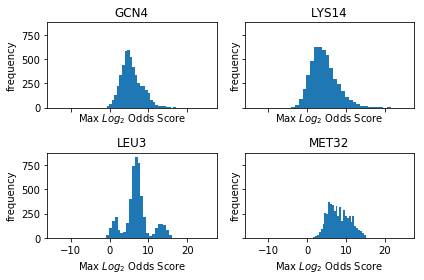

In [295]:
fig, axarr = plt.subplots(2,2, sharex=True, sharey=True)
axarr_flat = axarr.flatten()
for jj, motif_name in enumerate(['GCN4', 'LYS14', 'LEU3', 'MET32']): 
    ax = axarr_flat[jj]
    ax.hist(all_max_scores[motif_name]['max_score'].dropna(),bins=40)
    ax.set_xlabel('Max $Log_{2}$ Odds Score')
    ax.set_ylabel('frequency')
    ax.set_title(motif_name)

fig.tight_layout()  

In [223]:
range(1,N_modes_max)

range(1, 5)

In [ ]:
from sklearn.mixture import GaussianMixture

In [289]:
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_MA0303.1.jaspar', 1/pseudocount_factor, 3), #
                     'LYS14':(1e-4, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.jaspar', 51/998/pseudocount_factor, 2),
                     'LEU3': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/LEU3_MA0324.1.jaspar', 100/998/pseudocount_factor, 3), 
#                     'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
                     'MET32': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/MET32_MA0333.1.jaspar', 100/998/pseudocount_factor, 3)
                   }


#for spec

data = np.array(all_max_scores['MET32']['max_score'].dropna()).reshape(-1,1)
N_modes_max = 10
models = []
for jj in range(1,N_modes_max):
    models.append(GaussianMixture(jj).fit(data))

# compute the AIC and the BIC
AIC = [m.aic(data) for m in models]
BIC = [m.bic(data) for m in models]
                  

In [291]:
BIC

[28731.689470785441,
 26048.171366239003,
 26003.778588338853,
 25974.954689893628,
 25909.980001008273,
 25950.999074600841,
 25933.303858019899,
 25890.980215365878,
 25922.188293899173]

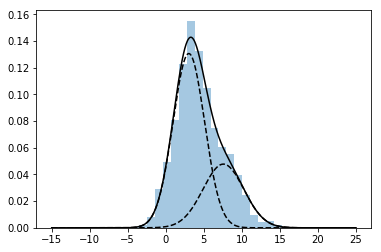

In [278]:


# plot 1: data + best-fit mixture
fig, ax = plt.subplots()

N_modes = 2
#M_best = models[np.argmin(BIC)]
M_best = models[N_modes-1]

x = np.linspace(-15, 25, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
logprob_ind = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = logprob_ind * pdf[:, np.newaxis]

ax.hist(data, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
#ax.text(0.04, 0.96, "Best-fit Mixture",
#        ha='left', va='top', transform=ax.transAxes)
#ax.set_xlabel('$x$')
#ax.set_ylabel('$p(x)$')

In [275]:
M_best.covariances_

array([[[ 1.56889533]],

       [[ 1.78819216]],

       [[ 1.44540486]]])

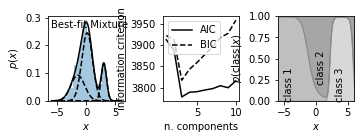

In [241]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(5, 1.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()


In [242]:
models

[GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=1, n_init=1, precisions_init=None,
         random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=2, n_init=1, precisions_init=None,
         random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=3, n_init=1, precisions_init=None,
         random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=4, n_init=1, precisions_in

In [65]:
from Bio import motifs
from Bio.Alphabet import IUPAC
import copy


In [102]:
motif_fname = home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_MA0303.1.jaspar'

with open(motif_fname) as f: 
    motif = motifs.read(f, "jaspar")
    
motif.background = background

motif_rev = copy.deepcopy(motif)
motif_rev.background = background_rev
motif_rev.background

In [118]:
L_prom = 700

all_promoters = SeqIO.parse(all_promoters_fname, "fasta")
all_max_scores_dict = {'id':[],'len':[],'max_score': []}

for prom in all_promoters:
    all_max_scores_dict['id'].append(prom.id)
    
    prom.seq.alphabet = IUPAC.unambiguous_dna
    
    #truncate by promoter length
    start = max(len(prom.seq)-L_prom,0)
    seq_trunc = prom.seq[start:len(prom.seq)]
    
    all_max_scores_dict['len'].append(len(seq_trunc))
    
    #calculate forward scores
    scores = motif.pssm.calculate(seq_trunc)
    max_score_fwd = max(scores)
    
    #calculate reverse scores
    seq_trunc_rev = seq_trunc.reverse_complement()
    scores_rev = motif_rev.pssm.calculate(seq_trunc_rev)
    max_score_rev = max(scores_rev)
    
    max_score = max(max_score_fwd,max_score_rev)
    
    all_max_scores_dict['max_score'].append(max_score)
    
    #also search reverse strand
    #catch when log odds is above a certain threshold

all_max_scores = pd.DataFrame.from_dict(all_max_scores_dict, orient='columns')
all_max_scores.set_index('id', inplace=True)
max_score_mean = all_max_scores['max_score'].mean()
max_score_std = all_max_scores['max_score'].std()
all_max_scores['Z-score'] = (all_max_scores['max_score']-max_score_mean)/max_score_std
all_max_scores



In [ ]:
fname_prefix = genome_name + '_all_' 
fname_prefix = genome_name + '_all_' 




#Make dataframe to store hits
prom_hits_spec = pd.DataFrame.from_dict(all_promoters_id_to_L, orient='index', columns = ['L_prom'])
# y1000_id_to_Lprom_df = pd.DataFrame.from_dict(y1000_id_to_Lprom, orient='index', columns = ['Lprom'])
# goi_hits = goi_hits.merge(y1000_id_to_Lprom_df, how = 'outer', left_index=True, right_index=True)

#make database with fimo hits for each gene
for motif_name, (thresh, motif_fname, motif_in_file) in motif_hit_params.items(): 
    fimo_hits = y1000plus_tools.promoter_scan_fimo(all_promoters_fname, fname_prefix, motif_name, motif_fname, thresh, motif_in_file='All')   

    fimo_hits_motif = {}
    #for each gene in the genome, make list of hits and scores

    for (genename, prom_hits_row) in prom_hits_spec.iterrows():
        genename
        prom_Lprom = prom_hits_row['L_prom']



        fimo_hits_subset = fimo_hits[fimo_hits['sequence_name']==genename]
        if len(fimo_hits_subset)>0:     
            #                prom_Lprom = y1000_id_to_Lprom[y1000_id]
            #prom_hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]

            #Location is distance from the start codon
            locs = []
            strands = []
            pvals = []
            seqs = []

            for jj,fimo_hits_row in fimo_hits_subset.iterrows():
                #Just recording location of the start of the motif
                strand = fimo_hits_row['strand']

                if strand == '-':
                    loc = prom_Lprom-fimo_hits_row['stop']
                elif strand == '+': 
                    loc = prom_Lprom-fimo_hits_row['start']

                if loc<L_prom: 
                    strands.append(strand)
                    locs.append(loc)
                    seqs.append(fimo_hits_row['matched_sequence'])
                    pvals.append(fimo_hits_row['p-value'])

            #identify best pval and store as single value

            if len(strands)>0:
                best_ind = np.argmin(pvals)
                best = np.min(pvals)

                fimo_hits_motif[genename]=(locs, strands, pvals, seqs, best, best_ind)

    fimo_hits_motif_df = pd.DataFrame.from_dict(fimo_hits_motif, orient='index', columns = [motif_name + '_location', motif_name+ '_strand',motif_name + '_pval', motif_name + '_sequence', motif_name +'_best', motif_name + '_best_ind'])

    prom_hits_spec = prom_hits_spec.merge(fimo_hits_motif_df, how = 'left', left_index =True, right_index = True)

prom_hits[spec] = prom_hits_spec





#Gene groups = 'lys', 'met', 'bcaa', 'leu', 'arg'   #, 'all'

In [40]:
def background_from_promoters(all_promoters_fname, L_prom):
    background_counts= {'A':0, 'C':0, 'T':0, 'G':0} #, 'R':0, 'Y':0, 'N':0}
    all_promoters = SeqIO.parse(all_promoters_fname, "fasta")

    for prom in all_promoters:
        start = max(len(prom.seq)-L_prom,0)
        seq_trunc = prom.seq[start:len(prom.seq)]
        for base in 'ACTG': #RYN': 
            newcount = seq_trunc.count(base)
            background_counts[base] = background_counts[base] + newcount


    counts_tot = sum(background_counts.values())
    background = {}
    for base, count in background_counts.items(): 
        background[base] = count/counts_tot

    background_rev = {}
    background_rev['A']=background['T']
    background_rev['C']=background['G']
    background_rev['T']=background['A']
    background_rev['G']=background['C']
    
    return background, background_rev


In [73]:
def promoters_all_max_scores(all_promoters_fname, motif_name, thresh, motif_fname, pseudocount, background, background_rev, L_prom, L_prom_min):
    #calculate all max scores for a given set of promoters given a motif and relevant parameters
       
    #Load Motif
    with open(motif_fname) as f: 
        motif = motifs.read(f, "jaspar")

    motif.pseudocounts = pseudocount
    motif.background = background

    motif_rev = copy.deepcopy(motif)
    motif_rev.background = background_rev


    #iterate through promoters and save max score
    all_promoters = SeqIO.parse(all_promoters_fname, "fasta")
    all_max_scores_dict = {'id':[],'len':[],'max_score': []}

    for prom in all_promoters:
        all_max_scores_dict['id'].append(prom.id)

        prom.seq.alphabet = IUPAC.unambiguous_dna

        #truncate by promoter length
        start = max(len(prom.seq)-L_prom,0)
        seq_trunc = prom.seq[start:len(prom.seq)]

        all_max_scores_dict['len'].append(len(seq_trunc))

        if len(seq_trunc)<= L_prom_min: #motif.length:
            all_max_scores_dict['max_score'].append(np.nan)

        else: 
            #calculate forward scores
            scores = motif.pssm.calculate(seq_trunc)
            max_score_fwd = max(scores)

            #calculate reverse scores
            seq_trunc_rev = seq_trunc.reverse_complement()
            scores_rev = motif_rev.pssm.calculate(seq_trunc_rev)
            max_score_rev = max(scores_rev)

            max_score = max(max_score_fwd,max_score_rev)

            all_max_scores_dict['max_score'].append(max_score)

            ##catch when log odds is above a certain threshold

    all_max_scores_motif = pd.DataFrame.from_dict(all_max_scores_dict, orient='columns')
    all_max_scores_motif.set_index('id', inplace=True)
    ecdf = ECDF(all_max_scores_motif['max_score'])
    all_max_scores_motif['percentile'] = ecdf(all_max_scores_motif['max_score'])
    all_max_scores_motif.rename(columns = {col : motif_name + '_' + col for col in ['max_score', 'percentile']}, inplace = True)
    
    return all_max_scores_motif